# TikzGraphs

This library uses the LaTeX package [pgf/tikz](http://www.ctan.org/pkg/pgf) to produce graphs. It integrates with IJulia, outputting SVG images to the notebook.

## Installation

In [ ]:
using Pkg
Pkg.add("TikzGraphs")

In addition, you will need to install the following dependencies if you do not already have them on your system.
* Pdf2svg. This is required by TikzPictures. On Ubuntu, you can get this by running `sudo apt-get install pdf2svg`. On Windows, you can download the binaries from http://www.cityinthesky.co.uk/opensource/pdf2svg/. Be sure to add pdf2svg to your path (and restart).
* Pgf (version 3.0 or later). Install using your latex package manager (e.g., texlive or miktex).

Once these things are installed, you should be able to run the following:

In [1]:
using TikzGraphs

## Examples

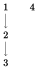

In [2]:
using TikzGraphs
using LightGraphs
g = DiGraph(4)
add_edge!(g, 1, 2)
add_edge!(g, 2, 3)
TikzGraphs.plot(g)

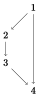

In [3]:
add_edge!(g, 3, 4)
add_edge!(g, 1, 4)
TikzGraphs.plot(g)

You can save your graphs to PDF, SVG, and TEX.

In [4]:
t = TikzGraphs.plot(g)
using TikzPictures # this is required for saving
TikzPictures.save(PDF("graph"), t)
TikzPictures.save(SVG("graph"), t)
TikzPictures.save(TEX("graph"), t)

## Labels

You can also specify the node labels.

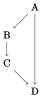

In [5]:
TikzGraphs.plot(g, ["A", "B", "C", "D"])

You can even use unicode.

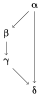

In [6]:
TikzGraphs.plot(g, ["α", "β", "γ", "δ"])

You can also have latex labels.

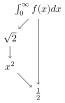

In [7]:
TikzGraphs.plot(g, [L"\int_0^\infty f(x) dx", L"\sqrt{2}", L"x^2", L"\frac{1}{2}"])

You can have repeated labels.

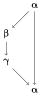

In [8]:
TikzGraphs.plot(g, ["α", "β", "γ", "α"])

You can specify the style for the nodes.

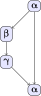

In [9]:
TikzGraphs.plot(g, ["α", "β", "γ", "α"], node_style="draw, rounded corners, fill=blue!10")

You can override the styles of selected nodes using a dictionary.

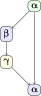

In [10]:
TikzGraphs.plot(g, ["α", "β", "γ", "α"], node_style="draw, rounded corners, fill=blue!10", node_styles=Dict(1=>"fill=green!10",3=>"fill=yellow!10"))

## Edges

You can set edge labels using a dictionary.

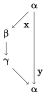

In [11]:
TikzGraphs.plot(g, ["α", "β", "γ", "α"], edge_labels=Dict((1,2)=>"x", (1,4)=>"y"))

You can set the style for the edges.

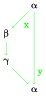

In [12]:
TikzGraphs.plot(g, ["α", "β", "γ", "α"], edge_labels=Dict((1,2)=>"x", (1,4)=>"y"), edge_style="green")

You can overide the style for specific edges as specified by a dictionary.

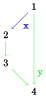

In [13]:
TikzGraphs.plot(g, edge_labels=Dict((1,2)=>"x", (1,4)=>"y"), edge_style="green", edge_styles=Dict((1,2)=>"blue"))

## Layouts

You can use different layouts (currently just Layered [default], Spring, and SimpleNecklace are supported).

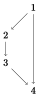

In [14]:
TikzGraphs.plot(g, Layouts.Layered())

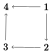

In [15]:
TikzGraphs.plot(g, Layouts.Spring())

You can set the random seed for the Spring layout.

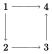

In [16]:
TikzGraphs.plot(g, Layouts.Spring(randomSeed=52))

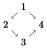

In [17]:
TikzGraphs.plot(g, Layouts.SimpleNecklace())

## Options

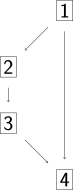

In [18]:
TikzGraphs.plot(g, node_style="draw", options="scale=2, font=\\huge\\sf")

## Future Plans

Gradually, more functionality from pgf/tikz will be migrated into this package.